In [1]:
import sys
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
root="/home/jovyan/work"
results_path=root+"/results/"
procesed_results_path=root+"/notebooks/ProjectAnalysis/TestAnalysis/results/"

# ExperimentalResults


## Load data

In [2]:
many4j_projects = pd.read_csv(results_path+'Many4JResults.csv') 

## Change days to years

In [3]:
many4j_projects['Age'] = many4j_projects['Age'].map(lambda days: days/365.) 

## 1.1 Absolute results for All Projects

In [4]:
def describeAbsoluteResults(dataset, name, data):
    return [
        dataset,
        len(data.index),
        data['Age'].sum(),
        data['LoC'].sum(),
        data['Total Commits'].sum(),
        data['Source buildable commits'].sum(),
        data['Test buildable commits'].sum(),
        data['Fully Testable commits'].sum(),
    ]    

## Absolute results

In [5]:
many4j_absolute = describeAbsoluteResults("Many4J", "All", many4j_projects)

all_absolute_df = pd.DataFrame([many4j_absolute], columns = [
        "Dataset",
        "# projects",
        "Age",
        "LoC",
        "# commits",
        "Source buildable commits",
        "Test buildable commit",
        "Fully Testable commits"
]).round(decimals=2).set_index('Dataset')
all_absolute_df.T#.astype(int)

Dataset,Many4J
# projects,66.00
Age,634.66
LoC,11143058.00
# commits,407579.00
Source buildable commits,103097.00
Test buildable commit,93925.00
Fully Testable commits,40540.00


## 1.2 Mean and median results for All Projects

In [6]:
alpha = 1e-3
def isNormalDistribution(name, data):
    k2, p = stats.normaltest(list(data.values))
    
    if p < alpha: 
        print("{:s} is NOT a normal distribution: p = {:g}".format(name, p))
    else: 
        print("{:s} is a normal distribution: p = {:g}".format(name, p))

In [7]:
def checkDistribution(dataset, data):
    isNormalDistribution(dataset+"-Age",data['Age'])
    isNormalDistribution(dataset+"-LoC",data['LoC'])
    isNormalDistribution(dataset+"-Total Commits",data['Total Commits'])
    isNormalDistribution(dataset+"-Source buildable",data['Source buildable commits'])
    isNormalDistribution(dataset+"-Test buildable",data['Test buildable commits'])
    isNormalDistribution(dataset+"-Fully Testable",data['Fully Testable commits'])

In [8]:
def describeResultsWithMeans(dataset, name, data):
    return [
        'Mean',
        dataset,
        data['Age'].mean(),
        data['LoC'].mean(),
        data['Total Commits'].mean(),
        data['Source buildable commits'].mean(),
        data['Test buildable commits'].mean(),
        data['Fully Testable commits'].mean(),
    ]

In [9]:
def describeResultsWithMedian(dataset, name, data):
    return [
        'Median',
        dataset,
        data['Age'].median(),
        data['LoC'].median(),
        data['Total Commits'].median(),
        data['Source buildable commits'].median(),
        data['Test buildable commits'].median(),
        data['Fully Testable commits'].median(),
    ]

In [10]:
def describeResultsWithStd(dataset, name, data):
    return [
        'Std',
        dataset,
        data['Age'].std(),
        data['LoC'].std(),
        data['Total Commits'].std(),
        data['Source buildable commits'].std(),
        data['Test buildable commits'].std(),
        data['Fully Testable commits'].std(),
    ]

In [11]:
checkDistribution("Many4J",many4j_projects)

Many4J-Age is a normal distribution: p = 0.00108862
Many4J-LoC is a normal distribution: p = nan
Many4J-Total Commits is NOT a normal distribution: p = 2.32506e-15
Many4J-Source buildable is NOT a normal distribution: p = 5.10712e-13
Many4J-Test buildable is NOT a normal distribution: p = 3.84921e-13
Many4J-Fully Testable is NOT a normal distribution: p = 1.11649e-24


## Table 7: Mean and Median values for the projects’ metrics.

In [12]:
all_means_df = pd.DataFrame(
    [ 
        describeResultsWithMeans("Many4J", "All", many4j_projects),
        describeResultsWithMedian("Many4J", "All", many4j_projects),
    ]
, columns = [
        "",
        "Dataset",
        "Age",
        "LoC",
        "Total commits",
        "Source buildable commits",
        "Test buildable commits",
        "Fully Testable commits",

]).set_index(['Dataset', '']).round(decimals=2)#.astype(int)
all_means_df.T

Dataset                      Many4J          
                               Mean    Median
Age                            9.62      9.69
LoC                       174110.28  26973.50
Total commits               6175.44   2831.00
Source buildable commits    1562.08   1020.00
Test buildable commits      1423.11    692.50
Fully Testable commits       614.24    218.00

## 1.3 Relative results for All Projects

In [13]:
def describeRelativeResults(dataset, name, data):
    return [
        'Mean',
        dataset,
        100*data['Source buildability'].mean(),
        100*data['Test buildability_A'].mean(),
        100*data['Test buildability_S'].mean(),
        100*data['TestabilityRate_A'].mean(),
        100*data['TestabilityRate_T'].mean(),
        100*data['FullyTestability_A'].mean(),
        100*data['FullyTestability_T'].mean(),
    ]

In [14]:
def describeRelativeResultsStd(dataset, name, data):
    return [
        'Std',
        dataset,
        100*data['Source buildability'].std(),
        100*data['Test buildability_A'].std(),
        100*data['TestabilityRate_A'].std(),
        100*data['TestabilityRate_T'].std(),
        100*data['FullyTestability_A'].std(),
        100*data['FullyTestability_T'].std(),
    ]

In [15]:
def describeRelativeResultsWithMedian(dataset, name, data):
     return [
        'Median',
        dataset,
        100*data['Source buildability'].median(),
        100*data['Test buildability_A'].median(),
         100*data['Test buildability_S'].median(),
        100*data['TestabilityRate_A'].median(),
        100*data['TestabilityRate_T'].median(),
        100*data['FullyTestability_A'].median(),
        100*data['FullyTestability_T'].median(),
    ]

In [16]:
def checkDistributionRelative(dataset, data):
    isNormalDistribution(dataset+"-SourceBuildability",data['Source buildability'])
    isNormalDistribution(dataset+"-TestBuildability",data['Test buildability_A'])
    isNormalDistribution(dataset+"-Total Commits",data['Total Commits'])
    isNormalDistribution(dataset+"-TestabilityRate_A",data['TestabilityRate_A'])
    isNormalDistribution(dataset+"-TestabilityRate_T",data['TestabilityRate_T'])
    isNormalDistribution(dataset+"-FullyTestability_A",data['FullyTestability_A'])
    isNormalDistribution(dataset+"-FullyTestability_T",data['FullyTestability_A'])

In [17]:
checkDistributionRelative("Many4J",many4j_projects)

Many4J-SourceBuildability is NOT a normal distribution: p = 0.000439414
Many4J-TestBuildability is a normal distribution: p = 0.0115549
Many4J-Total Commits is NOT a normal distribution: p = 2.32506e-15
Many4J-TestabilityRate_A is a normal distribution: p = 0.0218404
Many4J-TestabilityRate_T is NOT a normal distribution: p = 1.48062e-18
Many4J-FullyTestability_A is a normal distribution: p = 0.00180761
Many4J-FullyTestability_T is a normal distribution: p = 0.00180761


## Table 8

In [18]:
all_relative_df = pd.DataFrame(
    [ 
        describeRelativeResults("Many4J", "All", many4j_projects),
        describeRelativeResultsWithMedian("Many4J", "All", many4j_projects),
    ]
, columns = [
        "",
        "Dataset",
        "Source buildability",
        "Test buildability_A",
        "Test buildability_S",
        "TestabilityRate_A",
        "TestabilityRate_T",
        "FullyTestability_A",
        "FullyTestability_T",
]).round(decimals=2).set_index(['Dataset', ''])
all_relative_df.T

Dataset             Many4J       
                      Mean Median
Source buildability  47.29  47.12
Test buildability_A  41.73  39.22
Test buildability_S  88.26  97.35
TestabilityRate_A    38.63  34.88
TestabilityRate_T    94.15  99.56
FullyTestability_A   22.12  14.88
FullyTestability_T   52.53  59.32

## 1.4 Relative results per dataset

In [19]:
def viewDistributionOfResults(dataset):
    dataset_relative_df = dataset[
        ['Source buildability', 'Test buildability_A', 
         'FullyTestability_A', 'FullyTestability_T', 
         'TestabilityRate_A', 'TestabilityRate_T']
    ]
    return dataset_relative_df.describe().T

### Many4J

In [20]:
viewDistributionOfResults(many4j_projects)

,count,mean,std,min,25%,50%,75%,max
Source buildability,66.0,0.472902,0.310443,0.000394,0.216775,0.471184,0.750685,1.000000
Test buildability_A,66.0,0.417315,0.298015,0.000375,0.181125,0.392178,0.596928,0.977941
FullyTestability_A,66.0,0.221240,0.244568,0.000000,0.009445,0.148836,0.366581,0.935506
FullyTestability_T,66.0,0.525261,0.390930,0.000000,0.128798,0.593184,0.933741,1.000000
TestabilityRate_A,66.0,0.386317,0.290493,0.000375,0.159240,0.348844,0.547665,0.972881
TestabilityRate_T,66.0,0.941480,0.168191,0.075774,0.976032,0.995584,0.999357,1.000000


## 2. Plot of results

In [21]:
def plotProjects(dataset, name, figsize=(6,3)):
    
    print("Max %d"%dataset['Total Commits'].max())
    print("Min %d"%dataset['Total Commits'].min())
    
    df = dataset[
        ['Project', 'Total Commits', 'Source buildable commits', 'Test buildable commits', 'Fully Testable commits', 'TestabilityRate_T']
    ].set_index('Project').sort_values(by=['Total Commits'], ascending=False)
    
    fig, ax = plt.subplots(figsize=figsize)
    bar_width = 0.9
    index = np.arange(len(df.index))
    #index = df.index
    
    ax.bar(index,df["Total Commits"], bar_width, label="Total Commits", zorder=1, color="tab:blue")
    ax.bar(index,df["Source buildable commits"], bar_width, label="Source-compilable commits", zorder=1, color="orange")
    ax.bar(index,df["Test buildable commits"], bar_width, label="Test-compilable commits", zorder=1,color="purple")
    #ax.bar(index,df["TestabilityRate_T"]*df["Test buildable commits"], bar_width, label="TestabilityRate_T", zorder=1,color="green")
    ax.bar(index,df["Fully Testable commits"], bar_width, label="Fully Testable commits", zorder=1,color="limegreen")
    
    ax.set_xlabel('Projects')
    ax.set_ylabel('# commits')
    ax.get_xaxis().set_ticks([])
    
    #ax.set_xticklabels(df.index, rotation=90, ha='right')
    
    plt.legend()
    #plt.tight_layout()
    plt.savefig("latex_figures/"+name+".pdf")
    plt.show()

Max 53286
Min 5031


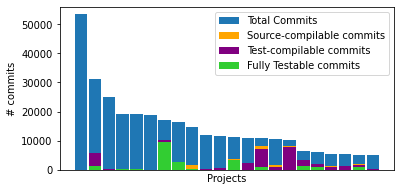

In [22]:
plotProjects(many4j_projects.sort_values(by=['Total Commits'], ascending=False)[0:22], "Many4j 1-22")

Max 4861
Min 1493


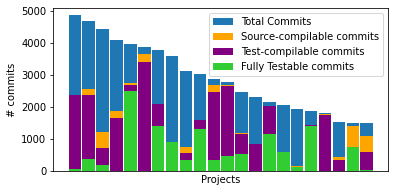

In [23]:
plotProjects(many4j_projects.sort_values(by=['Total Commits'], ascending=False)[22:44], "Many4j 23-44")

Max 1442
Min 76


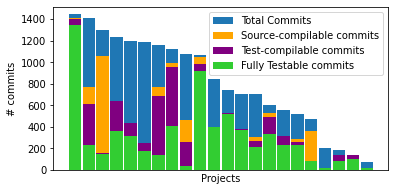

In [24]:
plotProjects(many4j_projects.sort_values(by=['Total Commits'], ascending=False)[44:], "Many4j 45-66")

## 3. Overview of results

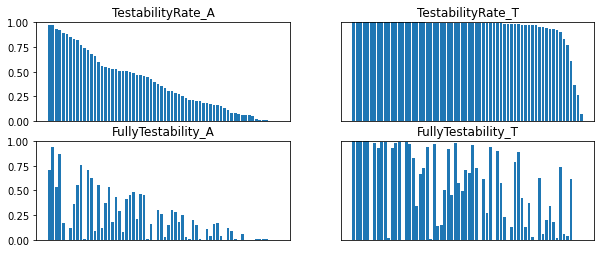

In [25]:
def setChart(ax, dataset, metric, sorted_by, ylabel=False):
    aux_df = dataset.sort_values(by=sorted_by, ascending=False).reset_index(drop=True)
    ax.bar(aux_df.index, aux_df[metric])
    ax.set_ylim(0,1)
    
    ax.get_xaxis().set_ticks([])
    if not metric.endswith("A"):
        ax.get_yaxis().set_ticks([])

    ax.set_title(metric)

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(10,4))

setChart(ax1[0], many4j_projects, "TestabilityRate_A", "TestabilityRate_A")
setChart(ax1[1], many4j_projects, "TestabilityRate_T", "TestabilityRate_T")
setChart(ax2[0], many4j_projects, "FullyTestability_A", "TestabilityRate_A")
setChart(ax2[1], many4j_projects, "FullyTestability_T", "TestabilityRate_T")


plt.savefig("latex_figures/Overview.pdf")